In [6]:
# Please don't change this cell, but do make sure to run it.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
answer_words = pd.read_csv('edited_data.csv')

In [8]:
def capitalize(variable):
    return variable.capitalize()

answer_words["Geography"] = answer_words["Geography"].apply(capitalize)

In [9]:
answer_words = answer_words.drop(columns = ["RowNumber", "Unnamed: 0"])


In [10]:
answer_words["CustomerId"].unique().shape[0]
answer_words = answer_words.set_index("CustomerId")

<AxesSubplot: ylabel='Frequency'>

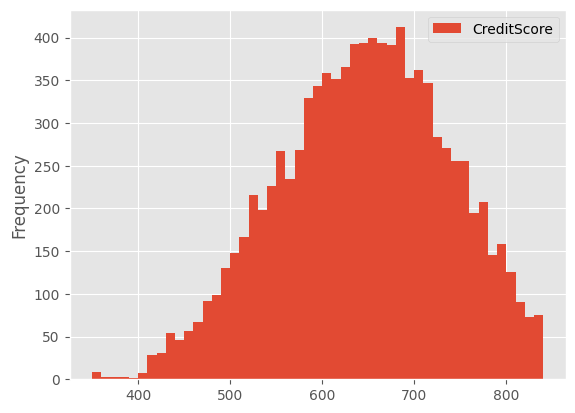

In [11]:
answer_words = answer_words[answer_words["CreditScore"] <= 850]
answer_words.plot(kind="hist", x="Age", y="CreditScore", bins=np.arange(350,850, 10))

In [25]:
answer_words = answer_words.dropna()
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [26]:
zeroZ = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 0)].shape[0]
zeroO = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 1)].shape[0]
oneZ = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 0)].shape[0]
oneO = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 1)].shape[0]
a = zeroZ/(zeroZ+oneO+oneZ+zeroO)
b = zeroO/(zeroZ+oneO+oneZ+zeroO)
c = oneZ/(zeroZ+oneO+oneZ+zeroO)
d = oneO/(zeroZ+oneO+oneZ+zeroO)
print("Have not Exited and are not active " + str(a))
print("Have not Exited and are active " + str(b))
print("Have Exited and are not active " + str(c))
print("Have Exited and are active " + str(d))

Have not Exited and are not active 0.35526315789473684
Have not Exited and are active 0.4413419043792688
Have Exited and are not active 0.12987143431096826
Have Exited and are active 0.07352350341502611


In [27]:
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [28]:
answer_words["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
answer_words["Gender"].unique()

array(['Female', 'Male'], dtype=object)

Display histogram of Revenue by Country

In [30]:
geo_revenue = answer_words[['Geography', 'Balance']]
geo_revenue = geo_revenue[geo_revenue['Balance'] > 0]
france = geo_revenue[geo_revenue['Geography'] == 'France']
germany = geo_revenue[geo_revenue['Geography'] == 'Germany']
spain = geo_revenue[geo_revenue['Geography'] == 'Spain']

france_mean = france['Balance'].mean()
germany_mean = germany['Balance'].mean()
spain_mean = spain['Balance'].mean()

print("France Average Balance: " + str(france_mean))
print("Germany Average Balance: " + str(germany_mean))
print("Spain Average Balance: " + str(spain_mean))

France Average Balance: 119871.32087108014
Germany Average Balance: 119774.74746095313
Spain Average Balance: 119768.54630588235


Text(0.5, 0, 'Balance')

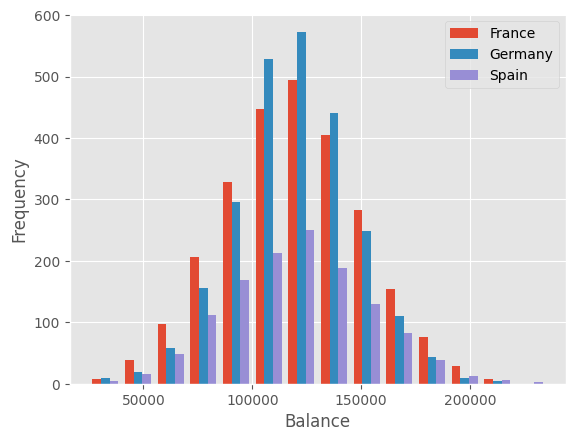

In [31]:
plt.hist([france['Balance'], germany['Balance'], spain['Balance']], bins=np.arange(25000, 250000, 15000), label=['France', 'Germany', 'Spain'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")

Display Revenue to Tenure

c:\Users\kanet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Average Balance for Tenure more than 5 years: 119241.25174498964
Average Balance for Tenure at least 5 years: 120290.63282577289


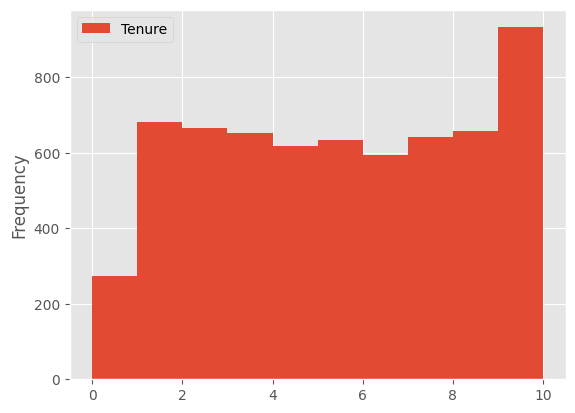

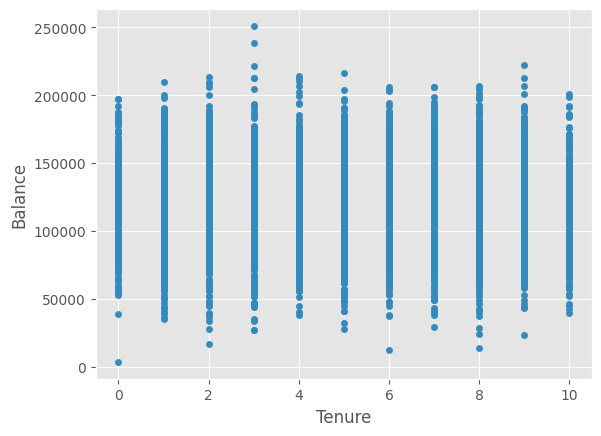

In [32]:
rev_ten = answer_words[['Tenure', 'Balance']]
rev_ten = rev_ten[rev_ten['Balance'] > 0]
rev_ten.plot(kind="hist", x="Balance")
rev_ten.plot(kind="scatter", x="Tenure", y="Balance")

# plt.hist(x=rev_ten['Tenure'], y=rev_ten['Balance'], bins=10)
# plt.legend(loc='upper right')

rev_low_ten = rev_ten[rev_ten['Tenure'] < 5]
rev_high_ten = rev_ten[rev_ten['Tenure'] >= 5]

low_ten_avg = rev_low_ten['Balance'].mean()
high_ten_avg = rev_high_ten['Balance'].mean()

print("Average Balance for Tenure more than 5 years: " + str(low_ten_avg))
print("Average Balance for Tenure at least 5 years: " + str(high_ten_avg))

Display Revenue By Age

c:\Users\kanet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\kanet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Age', ylabel='Balance'>

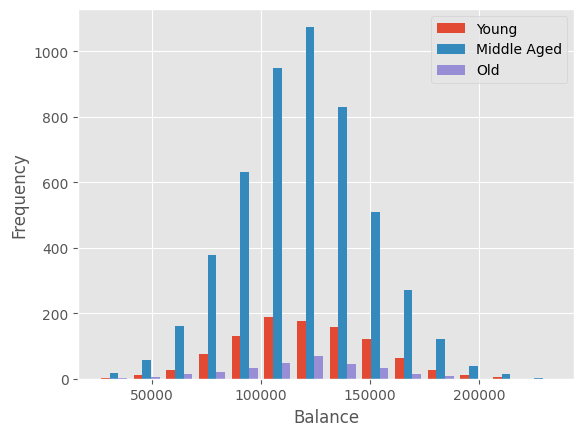

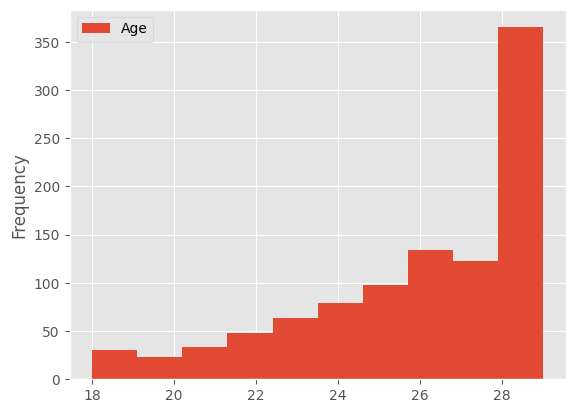

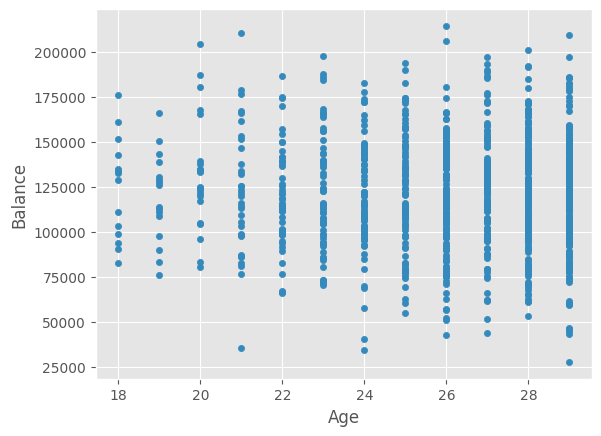

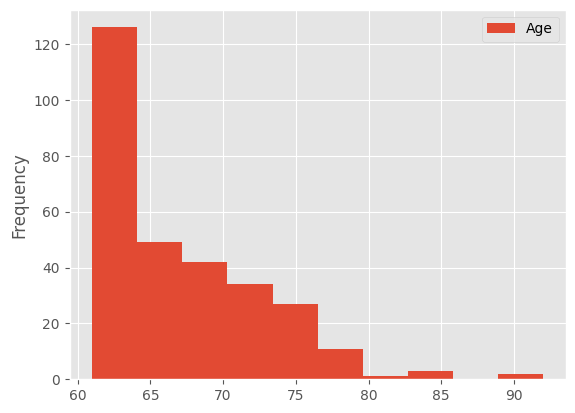

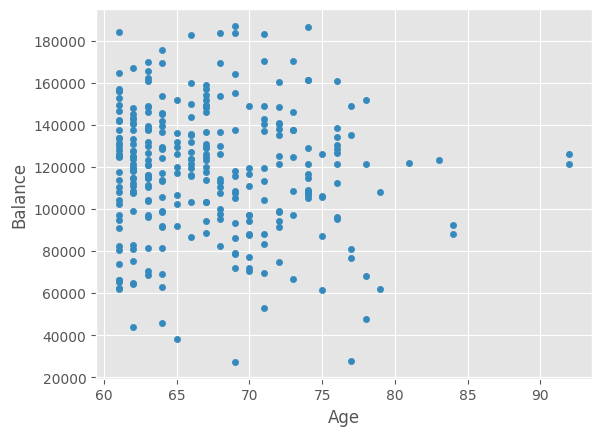

In [33]:
rev_age = answer_words[['Age', 'Balance']]
rev_age = rev_age[rev_age['Balance'] > 0]

rev_age_young = rev_age[rev_age['Age'] < 30]
rev_age_old = rev_age[rev_age['Age'] > 60]
rev_age_middle = rev_age[(rev_age['Age'] >= 30) & (rev_age['Age'] <= 60)]

plt.hist([rev_age_young['Balance'],rev_age_middle['Balance'], rev_age_old['Balance']], bins=np.arange(25000, 250000, 15000), label=['Young', 'Middle Aged', 'Old'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")

rev_age_young.plot(kind="hist", x="Balance")
rev_age_young.plot(kind="scatter", x="Age", y="Balance")
rev_age_old.plot(kind="hist", x="Balance")
rev_age_old.plot(kind="scatter", x="Age", y="Balance")

In [34]:
young_avg = rev_age_young['Balance'].mean()
middle_avg = rev_age_middle['Balance'].mean()
old_avg = rev_age_old['Balance'].mean()

print("Young Average Balance: " + str(young_avg))
print("Middle Aged Average Balance: " + str(middle_avg))
print("Old Average Balance: " + str(old_avg))

Young Average Balance: 121146.71203610834
Middle Aged Average Balance: 119638.26147343473
Old Average Balance: 118299.23057627119


Revenue By Gender

Text(0.5, 0, 'Balance')

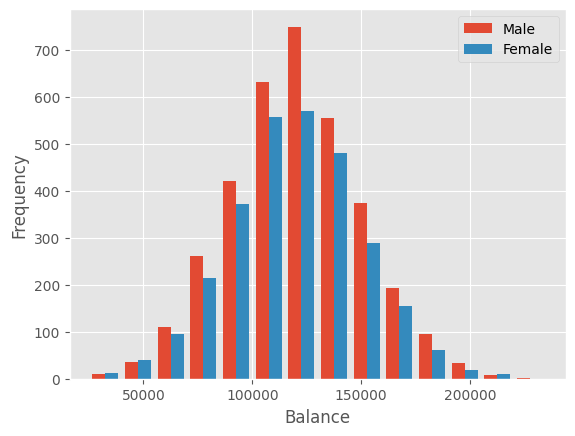

In [35]:
rev_gender = answer_words[['Gender', 'Balance']]
rev_gender = rev_gender[rev_gender['Balance'] > 0]
rev_male = rev_gender[rev_gender['Gender'] == 'Male']
rev_female = rev_gender[rev_gender['Gender'] == 'Female']

plt.hist([rev_male['Balance'], rev_female['Balance']], bins=np.arange(25000, 250000, 15000), label=['Male', 'Female'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")

In [36]:
male_avg = rev_male['Balance'].mean()
female_avg = rev_female['Balance'].mean()

print("Male Average Balance: " + str(male_avg))
print("Female Average Balance: " + str(female_avg))

Male Average Balance: 120539.49280333525
Female Average Balance: 118934.20465415363


In [76]:
churn_data = answer_words[['Gender', 'Geography', 'Age', 'CreditScore','Exited']]
churn_data

,Gender,Geography,Age,CreditScore,Exited
CustomerId,,,,,
15634602,Female,France,42,619,1.0
15647311,Female,Spain,41,608,0.0
15701354,Female,France,39,699,0.0
15737888,Female,Spain,43,850,0.0
15592531,Male,France,50,822,0.0
...,...,...,...,...,...
15606229,Male,France,39,771,0.0
15569892,Male,France,35,516,0.0
15584532,Female,France,36,709,1.0


In [77]:
churn_data['Geography'] = churn_data['Geography'].astype('category')
churn_data.dtypes

#label encode geography - 0 is France, 1 is Germany, 2 is Spain
churn_data['Geography_Cat'] = churn_data['Geography'].cat.codes

#one hot encode gender - 1 is male, 0 is female
sorted_churn = pd.get_dummies(churn_data, columns=['Gender'])


C:\Users\kanet\AppData\Local\Temp\ipykernel_21360\1935081940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Geography'] = churn_data['Geography'].astype('category')
C:\Users\kanet\AppData\Local\Temp\ipykernel_21360\1935081940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Geography_Cat'] = churn_data['Geography'].cat.codes


In [78]:
sorted_churn = sorted_churn.drop(columns=['Gender_Female', 'Geography'])
sorted_churn

,Age,CreditScore,Exited,Geography_Cat,Gender_Male
CustomerId,,,,,
15634602,42,619,1.0,0,0
15647311,41,608,0.0,2,0
15701354,39,699,0.0,0,0
15737888,43,850,0.0,2,0
15592531,50,822,0.0,0,1
...,...,...,...,...,...
15606229,39,771,0.0,0,1
15569892,35,516,0.0,0,1
15584532,36,709,1.0,0,0


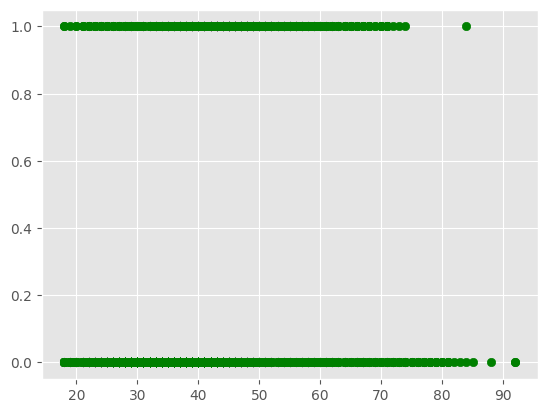

In [79]:
plt.scatter(sorted_churn['Age'], sorted_churn['Exited'], color='green')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X = sorted_churn.drop(columns=['Exited'])
y = sorted_churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_lr_train_pred = lr.predict(X_train)
lr.predict(X_test)

lr.score(X, y)

0.7789272800321414